In [1]:
#Data Analytics Concept with Linear regression with the given data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel('/Users/yachu/Downloads/Excel_sample_2.xlsx', sheet_name= 'Student_Performance')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [5]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


/Users/yachu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


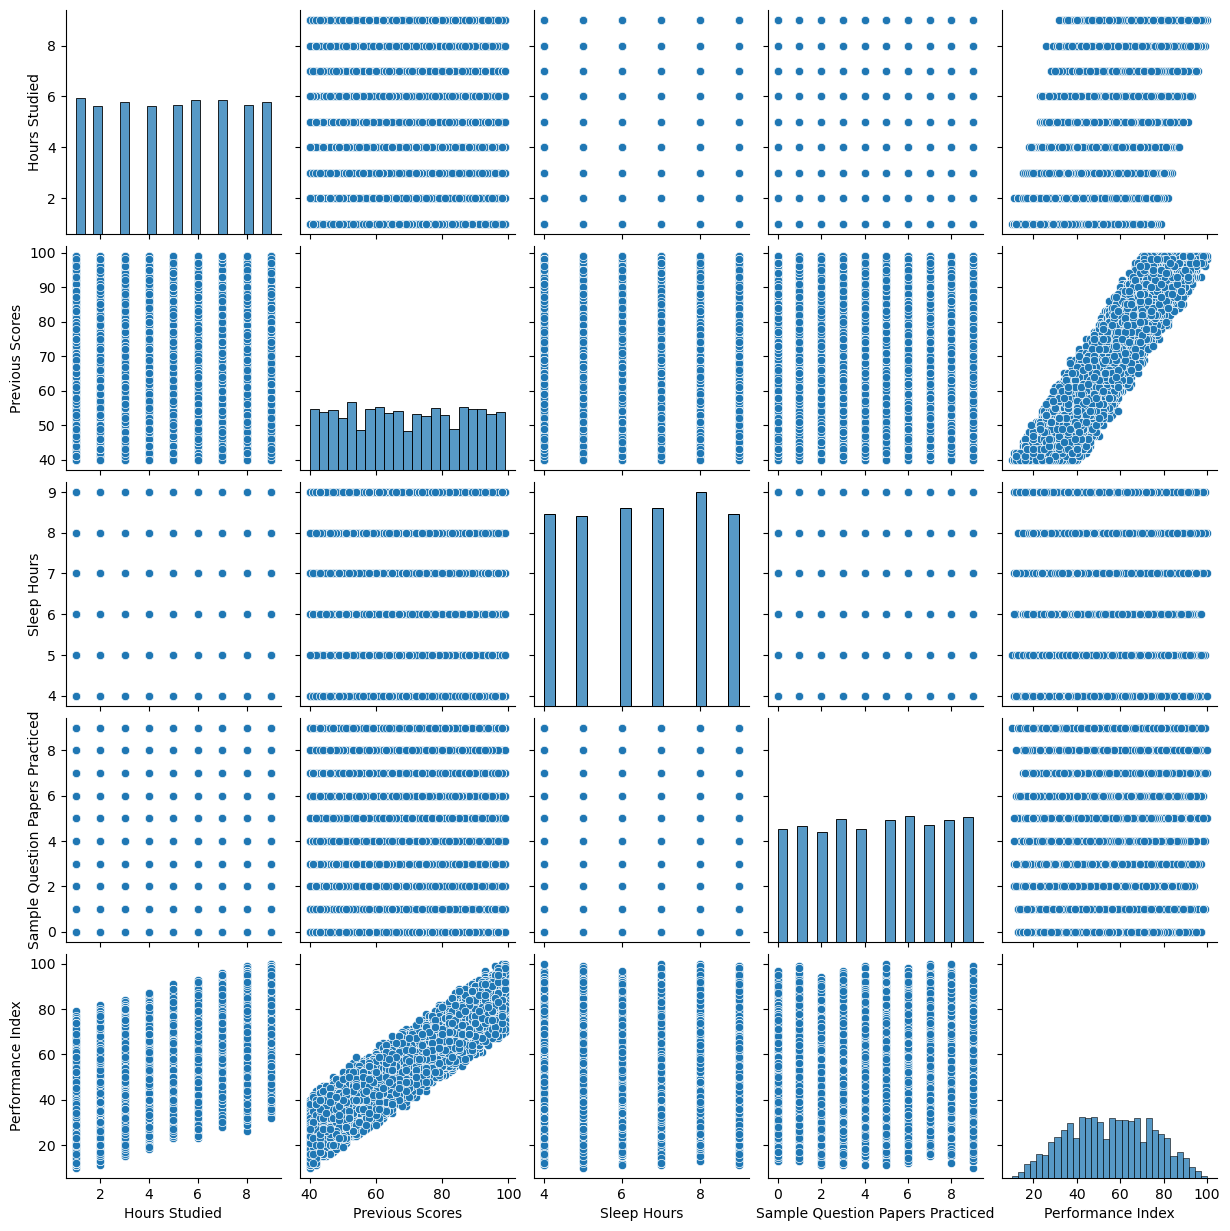

In [8]:
# Seaborn package Dataframe
sea.pairplot(df)

# Writing relationships between independent variable and dependent variable where x factors are Independent variable and y factors are target variable

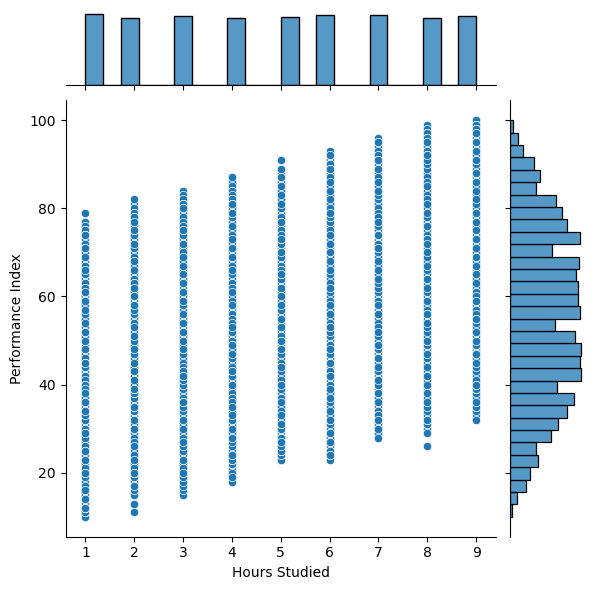

In [9]:
sea.jointplot(x = 'Hours Studied', y = 'Performance Index', data = df, kind = 'scatter')

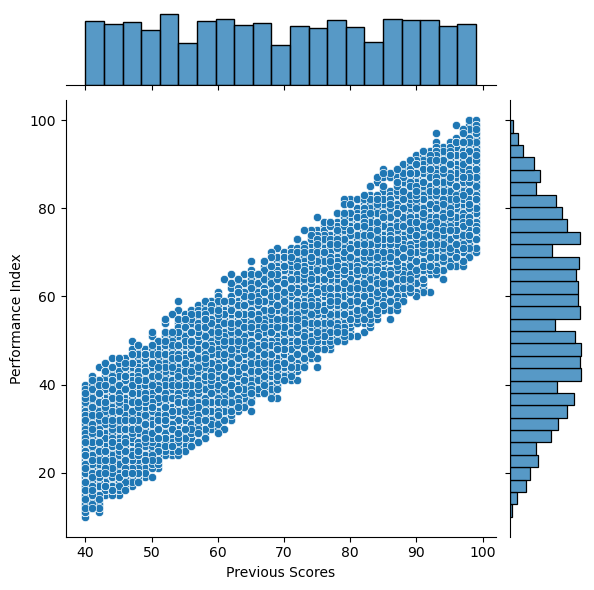

In [10]:
sea.jointplot(x = 'Previous Scores', y = 'Performance Index', data = df, kind = 'scatter')

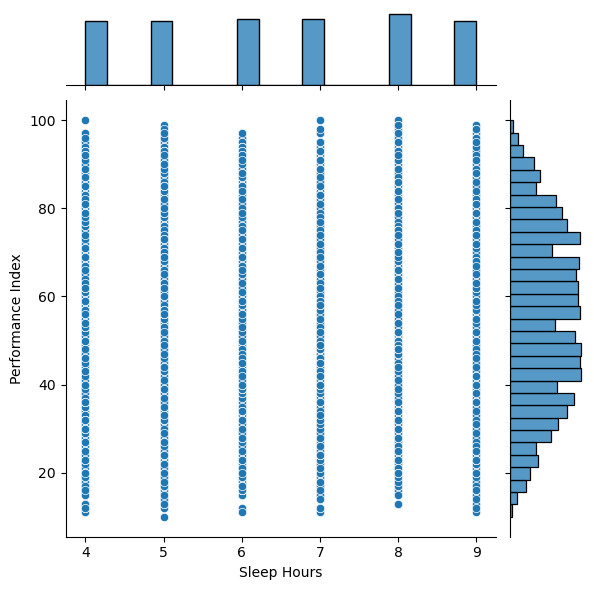

In [11]:
sea.jointplot(x = 'Sleep Hours', y = 'Performance Index', data = df, kind = 'scatter')

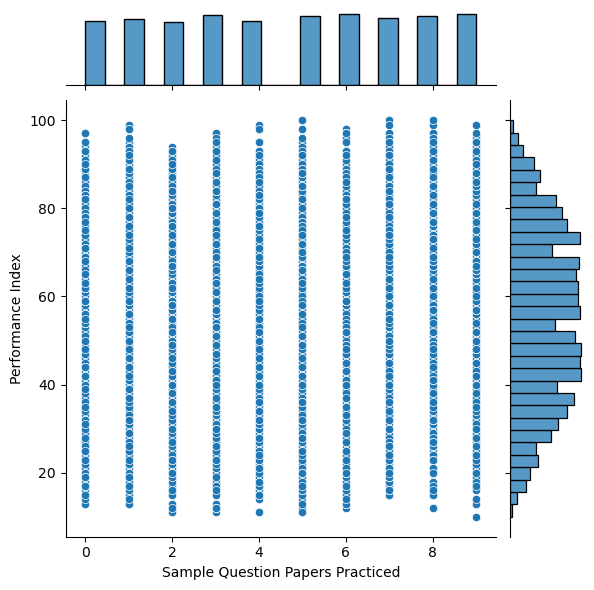

In [12]:
sea.jointplot(x = 'Sample Question Papers Practiced', y = 'Performance Index', data = df, kind = 'scatter')

Text(0.5, 1.0, 'Performance')

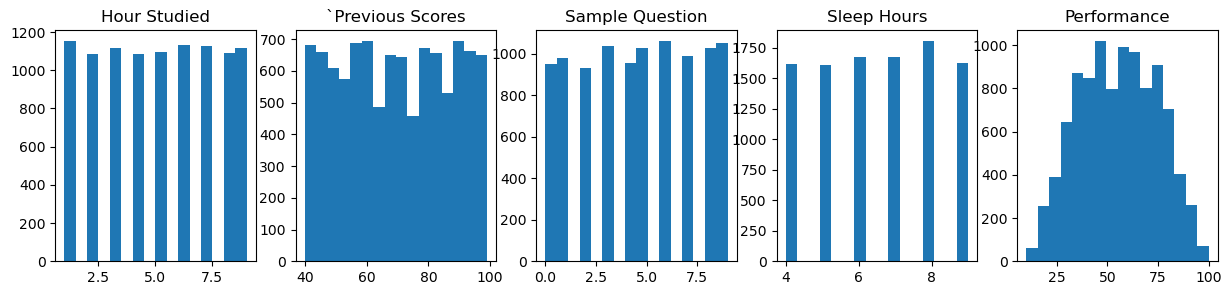

In [13]:
# # Subplot- Histogram plots
fig, axes = plt.subplots(1, 5, figsize=(15,3))
axes[0].hist(df['Hours Studied'], bins = 16)
axes[0].set_title('Hour Studied')
axes[1].hist(df['Previous Scores'], bins = 16)
axes[1].set_title('`Previous Scores')
axes[2].hist(df['Sample Question Papers Practiced'], bins = 16)
axes[2].set_title('Sample Question')
axes[3].hist(df['Sleep Hours'], bins = 16)
axes[3].set_title('Sleep Hours')
axes[4].hist(df['Performance Index'], bins = 16)
axes[4].set_title('Performance')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

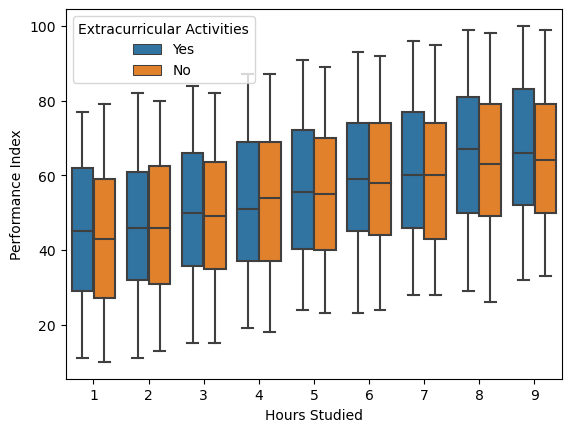

In [14]:
# Boxplot
sea.boxplot(x = 'Hours Studied', y = 'Performance Index', hue = 'Extracurricular Activities', data = df)

In [15]:
df2 = pd.get_dummies(df['Extracurricular Activities'], prefix = 'Extracurricular Activities')

In [16]:
print(df2)

      Extracurricular Activities_No  Extracurricular Activities_Yes
0                             False                            True
1                              True                           False
2                             False                            True
3                             False                            True
4                              True                           False
...                             ...                             ...
9995                          False                            True
9996                          False                            True
9997                          False                            True
9998                          False                            True
9999                           True                           False

[10000 rows x 2 columns]


In [17]:
df = df.drop(['Extracurricular Activities'], axis = 1)

In [18]:
print(df)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1                 91  
1                                    2                 65  
2                                    2                 45  
3                                    2                 36  
4                                    5                 66  
...

In [19]:
df2_new = pd.concat([df, df2], axis = 1)

In [20]:
print(df2_new)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  Performance Index  \
0                                    1                 91   
1                                    2                 65   
2                                    2                 45   
3                                    2                 36   
4                                    5                 66 

<Axes: >

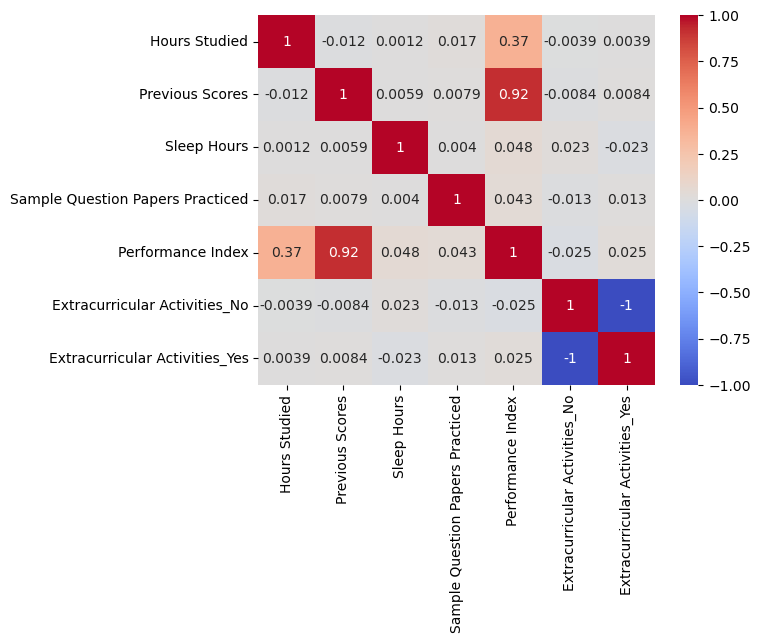

In [21]:
# Heatmap
sea.heatmap(df2_new.corr(), cmap = 'coolwarm', annot=True)

In [23]:
#linear regression deployment model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df2_new.drop(['Performance Index'], axis=1)
y = df2_new['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

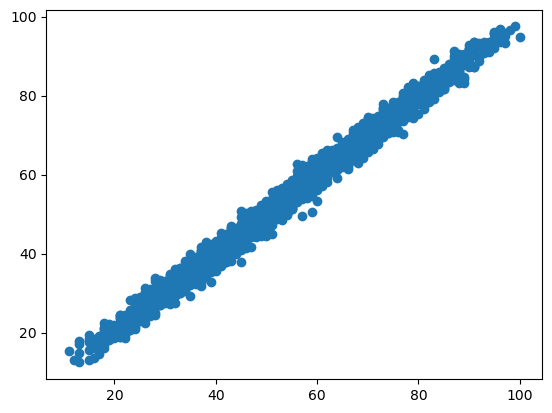

In [24]:
y_predict = lr.predict(X_test)
plt.scatter(y_test, y_predict)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
print(lr.coef_)

[ 2.85283863  1.01817717  0.48524068  0.19369907 -0.31645304  0.31645304]


In [29]:
print(lr.intercept_)

-33.786307520452716
